In [20]:
import pymatgen.core.structure as sp
import pymatgen.vis.structure_vtk as viz
from ase.calculators.vasp import VaspChargeDensity
% matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

struct = sp.Structure
v = struct.from_file('CHGCAR')
v.frac_coords
C = VaspChargeDensity('CHGCAR')
charge = C.chg
charge = np.array(charge)

In [14]:
import ase.io.vasp
cell = ase.io.vasp.read_vasp("CHGCAR")
# ase.io.vasp.write_vasp("CHGCAR4x4x4",cell*(4,4,4), label='444supercell',direct=True,sort=True)

In [32]:
dir(ase.io.vasp)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__get_xml_parameter',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__warningregistry__',
 'atomtypes_outpot',
 'basestring',
 'get_atomtypes',
 'get_atomtypes_from_formula',
 'os',
 'read_vasp',
 'read_vasp_out',
 'read_vasp_xdatcar',
 'read_vasp_xml',
 'write_vasp']

In [13]:
C.atoms

[]

In [38]:
def T(vec,v):
#     transform = np.array((([v.a,(v.b)*np.cos(v.gamma),(v.c)*np.cos(v.beta)],[0,(v.b)*np.sin(v.gamma),(v.c)*(np.cos(v.alpha)-np.cos(v.beta)*np.cos(v.gamma))/np.sin(v.gamma)],[0,0,v.a*v.b*v.c*np.sqrt(1-(np.cos(v.alpha))**2-(np.cos(v.beta))**2 - (np.cos(v.gamma))**2 + 2*np.cos(v.alpha)*np.cos(v.beta)*np.cos(v.gamma))/(v.a*v.b*np.sin(v.gamma))])))
    transform = np.array((([v.a,(v.b)*np.cos(v.gamma*np.pi/180),(v.c)*np.cos(v.beta*np.pi/180)],
                           [0,(v.b)*np.sin(v.gamma*np.pi/180),(v.c)*(np.cos(v.alpha*np.pi/180)-np.cos(v.beta*np.pi/180)*np.cos(v.gamma*np.pi/180))/np.sin(v.gamma*np.pi/180)],
                           [0,0,v.a*v.b*v.c*np.sqrt(1-(np.cos(v.alpha*np.pi/180))**2-(np.cos(v.beta*np.pi/180))**2 - (np.cos(v.gamma*np.pi/180))**2 + 2*np.cos(v.alpha*np.pi/180)*np.cos(v.beta*np.pi/180)*np.cos(v.gamma*np.pi/180))/(v.a*v.b*np.sin(v.gamma*np.pi/180))])))
    return(np.dot(transform,vec))



In [39]:
storedcoords = np.zeros((60,60,336))
xx = []
yy = []
zz = []

for i in range(60):
    for j in range(60):
        for k in range(336):
            vec = T(np.array([i*v.lattice.a/60,j*v.lattice.b/60,k*v.lattice.c/336]),v.lattice)
            xx.append(vec[0])
            yy.append(vec[1])
            zz.append(vec[2])

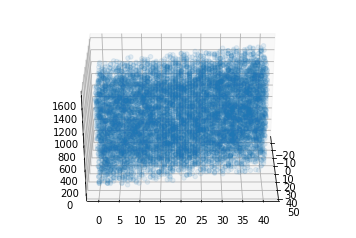

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
xx = np.array(xx)
yy = np.array(yy)
zz = np.array(zz)
ax = fig.add_subplot(111, projection='3d')
idc = np.random.choice(len(xx),10000)
ax.scatter(xx[idc],yy[idc],zz[idc],alpha=0.1)

ax.view_init(30, 0)

In [41]:
avec = T(np.array([v.lattice.a,0,0]),v.lattice)
bvec = T(np.array([0,v.lattice.b,0]),v.lattice)
cvec = T(np.array([0,0,v.lattice.c]),v.lattice)

In [62]:
# plots a scatter of specific charge values
# newchgx = []
# newchgy = []
# newchgz = []

# newchgxneg = []
# newchgyneg = []
# newchgzneg = []
# eps = 10**(-10)
#     for i in range(60):
#         for j in range(60):
# for k in range(336):
#             if thresh-eps<charge[0,i,j,50]<thresh+eps:
#                 vec = T(np.array([i*v.lattice.a/60,j*v.lattice.b/60,k*v.lattice.c/336]),v.lattice)
#                 newchgx.append(vec[0])
#                 newchgy.append(vec[1])
#                 newchgz.append(vec[2])
#             elif thresh-eps<-charge[0,i,j,50]<thresh+eps:
#                 vec = T(np.array([i*v.lattice.a/60,j*v.lattice.b/60,k*v.lattice.c/336]),v.lattice)
#                 newchgxneg.append(vec[0])
#                 newchgyneg.append(vec[1])
#                 newchgzneg.append(vec[2])
#             else:
#                 pass
#     fig = plt.figure(figsize=(15,6))
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(newchgx,newchgy,newchgz,c='r')
#     ax.scatter(newchgxneg,newchgyneg,newchgzneg,c='b')
#     ax.plot([0,avec[0]],[0,avec[1]],[0,avec[2]],c='g')
#     ax.plot([0,bvec[0]],[0,bvec[1]],[0,bvec[2]],c='g')
#     ax.plot([0,cvec[0]],[0,cvec[1]],[0,cvec[2]],c='g')
#     ax.view_init(30, 90)
# #     ax.set_xlim([0,47])
# #     ax.set_ylim([0,28])
# #     ax.set_zlim([10,200])

def plotter(sliceval):
    k=sliceval
    new_x =[]
    new_y = []
    for i in range(60):
        for j in range(60):
            vec = T(np.array([i*v.lattice.a/60,j*v.lattice.b/60,k*v.lattice.c/336]),v.lattice)
            new_x.append(vec[0])
            new_y.append(vec[1])
    new_x = np.array(new_x)
    print(new_x.shape)
    new_y = np.array(new_y)
   
    new_x = new_x.reshape((60,60))
    new_y = new_y.reshape((60,60))
    plt.contourf(new_x,new_y,charge[0,:,:,k])
    plt.plot([0,avec[0]],[0,avec[1]],c='g')
    plt.plot([0,bvec[0]],[0,bvec[1]],c='g')
    

In [63]:
v.lattice

Lattice
    abc : 6.919638000000073 6.91963774626136 39.488879
 angles : 90.0 90.0 120.00000949318255
 volume : 1637.4653903999563
      A : 6.919638 -1e-06 0.0
      B : -3.459819 5.992582 -0.0
      C : 0.0 -0.0 39.488879

(3600,)


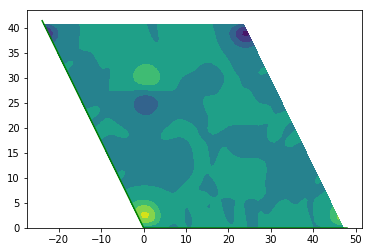